# TP2 Machine Learning
## Apprentissage de réseaux de neurones pour la classification
Vous devez écrire un notebook python dans Jupyter. Les fonctions en italique sont documentées dans
le tutoriel de scikitlearn (https://scikit-learn.org/stable/index.html ).
### 1. Réseaux mono-couche pour la classification
#### a) Charger le fichier de données dataset1.dat.
Préciser le nombre d’observations, leurs dimensions et le nombre de classes.
Séparer les données en bases d’apprentissage et de test avec un ratio de 70/30. Afficher les
données.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

data = np.loadtxt('dataset1.dat')

X = data[:, :-1]
y = data[:, -1]

nb_observations, nb_features = X.shape
nb_classes = len(np.unique(y))

print("Nombre d'observations :", nb_observations)
print("Dimensions des observations :", nb_features)
print("Nombre de classes :", nb_classes)

# Séparer les données en bases d’apprentissage et de test avec un ratio de 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print("Base d'apprentissage - Features (X) :\n", X_train)
# print("Base d'apprentissage - Étiquettes (y) :\n", y_train)
# print("Base de test - Features (X) :\n", X_test)
# print("Base de test - Étiquettes (y) :\n", y_test)


Nombre d'observations : 300
Dimensions des observations : 2
Nombre de classes : 3


#### b) Dans la suite, on utilisera l’instruction suivante pour définir un réseau de neurones classifieur mono-couche :
clf1=SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
À quoi correspondent ces différents paramètres ?
Compte tenu des informations déterminées en a), préciser le nombre de paramètres libres (poids et biais) de ce réseau.

`loss='perceptron'` : Cela indique que l'algorithme utilisera la fonction de perte du perceptron, qui est une fonction de perte linéaire utilisée pour les problèmes de classification binaire.

`eta0=A` : C'est le taux d'apprentissage initial du modèle. Ce paramètre contrôle la taille des pas de mise à jour des poids lors de la descente de gradient. La valeur A doit être spécifiée.

`max_iter=B` : C'est le nombre maximum d'itérations que l'algorithme effectuera lors de l'entraînement. Une fois que ce nombre d'itérations est atteint, l'algorithme s'arrête, même si la convergence n'est pas atteinte.

`learning_rate='constant'` : Cela signifie que le taux d'apprentissage reste constant tout au long de l'entraînement.

In [11]:
A = 0.000001
B = 1
clf1=SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
clf1.fit(X_train, y_train)

weights = clf1.coef_
bias = clf1.intercept_

print("Poids du modèle :", weights)
print("Biais du modèle :", bias)

Poids du modèle : [[-8.76936527e-06 -2.22174132e-06]
 [ 1.38550881e-06  1.13221774e-05]
 [ 1.34404646e-05 -8.72495540e-06]]
Biais du modèle : [-1.1e-05 -2.2e-05 -2.0e-05]


/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### c) Répéter cinq fois l’expérience suivante :
Entraîner ce réseau (fonction fit) en utilisant les paramètres suivants :
▪ A = 0.000001 B = 1
A chaque fois, stocker le taux de reconnaissance (fonction score) en apprentissage.
Afficher la moyenne et l’écart-type de ce taux.
Afficher les frontières apprises et les données d’apprentissage

/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/line

Moyenne du taux de reconnaissance en apprentissage : 0.9
Écart-type du taux de reconnaissance en apprentissage : 0.0


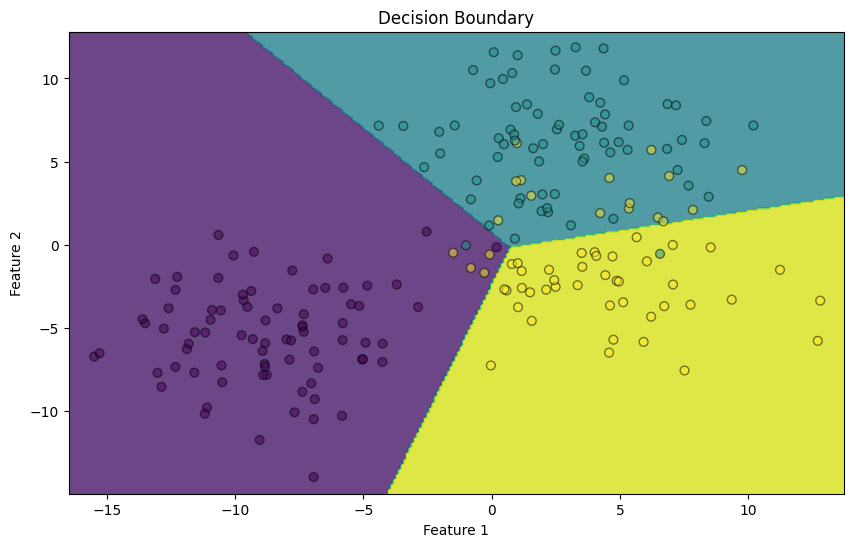

In [12]:
A = 0.000001
B = 1
nb_repetitions = 5
scores = []
for i in range(nb_repetitions):
    clf = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant', random_state=42)
    clf.fit(X_train, y_train)
    
    # Stocker le taux de reconnaissance en apprentissage
    score = clf.score(X_train, y_train)
    scores.append(score)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Moyenne du taux de reconnaissance en apprentissage :", mean_score)
print("Écart-type du taux de reconnaissance en apprentissage :", std_score)

plt.figure(figsize=(10, 6))
# Plotting the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
for i, clf in enumerate((clf,)):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, edgecolors='k', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

#### d) Répéter l’expérience c) en utilisant les paramètres suivants :
• A = 1 B = 1
• A = 0.000001 B = 10
• A = 1 B = 10
Conclure sur l’impact des paramètres A et B. Tenter de les améliorer.

/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/line

A = 1, B = 1
Moyenne du taux de reconnaissance en apprentissage : 0.9
Écart-type du taux de reconnaissance en apprentissage : 0.0


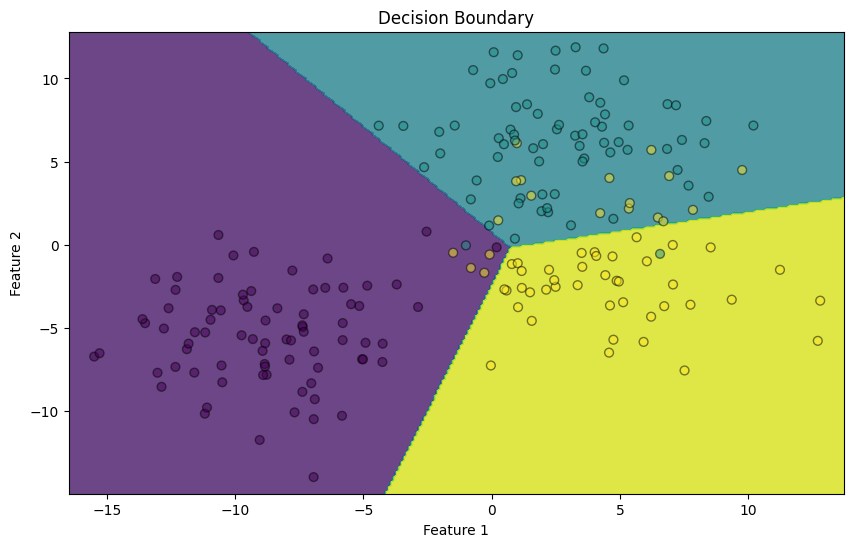

A = 1e-06, B = 10
Moyenne du taux de reconnaissance en apprentissage : 0.9023809523809524
Écart-type du taux de reconnaissance en apprentissage : 0.0023809523809523725


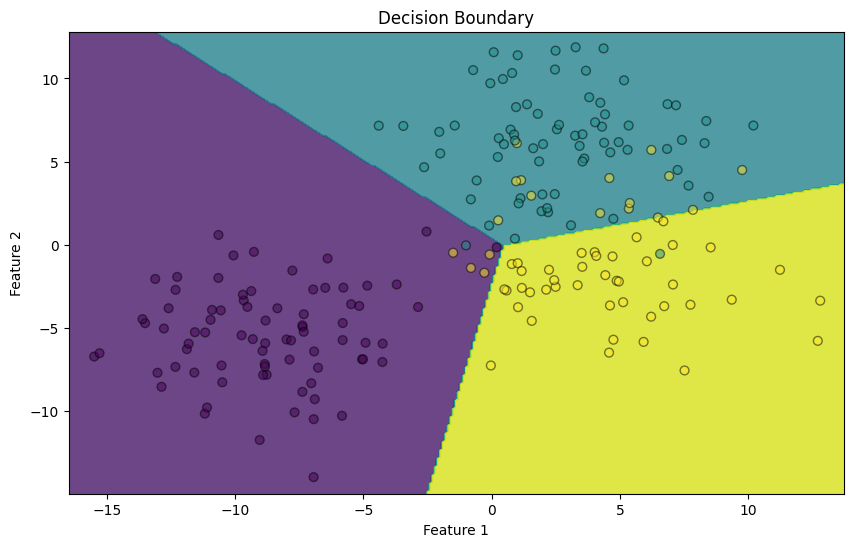

/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/JeffAudrey/Library/CloudStorage/OneDrive-GroupeESIEA/Environnement/lib/python3.12/site-packages/sklearn/line

A = 1, B = 10
Moyenne du taux de reconnaissance en apprentissage : 0.8984126984126986
Écart-type du taux de reconnaissance en apprentissage : 0.005939138709165015


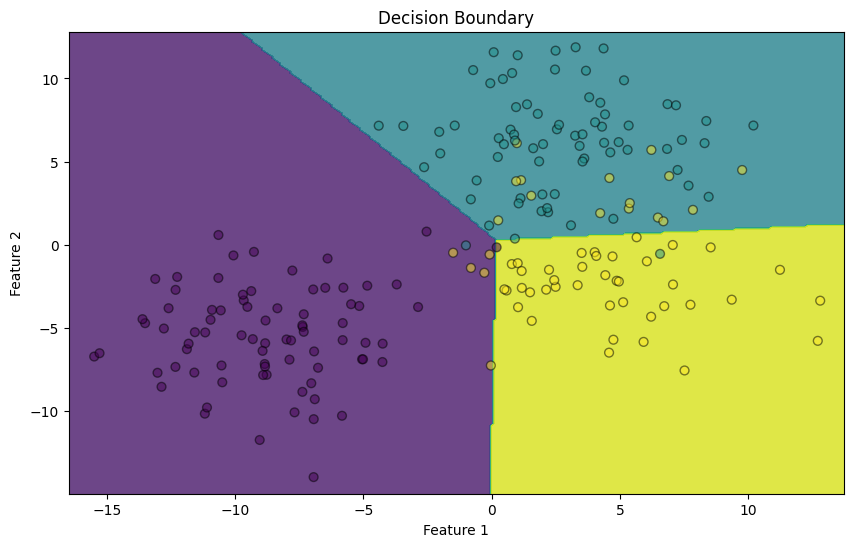

In [15]:
parametres = [(1, 1), (0.000001, 10), (1, 10)]
nb_repetitions = 5
scores = []

for A, B in parametres:
    for i in range(nb_repetitions):
        clf = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant', random_state=42)
        clf.fit(X_train, y_train)
        
        # Stocker le taux de reconnaissance en apprentissage
        score = clf.score(X_train, y_train)
        scores.append(score)

    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"A = {A}, B = {B}")
    print("Moyenne du taux de reconnaissance en apprentissage :", mean_score)
    print("Écart-type du taux de reconnaissance en apprentissage :", std_score)
    
    plt.figure(figsize=(10, 6))
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    for i, clf in enumerate((clf,)):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, edgecolors='k', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

#### e) Charger le fichier de données dataset2.txt. Répéter l’expérience d) en choisissant judicieusement A et B. Que doit-on changer pour résoudre ce problème de classification ?

In [ ]:
data2 = np.loadtxt('dataset2.txt')